In [1]:
import pandas as pd

# 재실행을 위해 데이터를 다시 로드합니다.
file_path = '종합db.csv'
data = pd.read_csv(file_path)

# '구' 열을 제외하고 상관관계 분석 다시 시도
correlation_without_district = data.drop(columns=['구','사고 비율(%)'], axis=1).corr()
correlation_without_district


,노인 인구수,사고 발생 건수,병원 수,노인여가복지시설 수,노인의료복지시설 수,재가노인복지시설 수,전통시장 수,공원 수
노인 인구수,1.000000,0.670044,0.598754,0.086991,0.494727,0.837696,-0.496074,0.659436
사고 발생 건수,0.670044,1.000000,0.573002,-0.070168,0.512079,0.726430,-0.031631,0.334208
병원 수,0.598754,0.573002,1.000000,0.146700,0.132558,0.342750,-0.257089,0.576230
노인여가복지시설 수,0.086991,-0.070168,0.146700,1.000000,0.105673,0.041972,-0.424955,0.055175
노인의료복지시설 수,0.494727,0.512079,0.132558,0.105673,1.000000,0.685354,-0.144207,-0.021846
재가노인복지시설 수,0.837696,0.726430,0.342750,0.041972,0.685354,1.000000,-0.253080,0.434683
전통시장 수,-0.496074,-0.031631,-0.257089,-0.424955,-0.144207,-0.253080,1.000000,-0.421956
공원 수,0.659436,0.334208,0.576230,0.055175,-0.021846,0.434683,-0.421956,1.000000


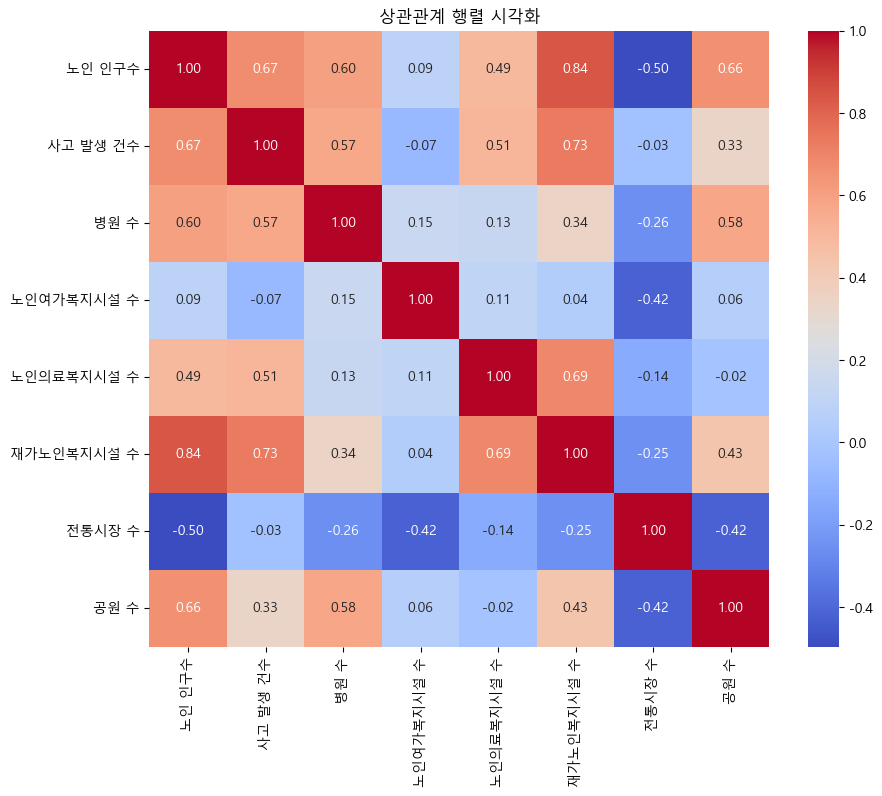

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 상관관계 행렬을 시각화하기 위한 코드
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_without_district, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 행렬 시각화')
plt.show()

재가노인복지시설 수 (0.726430): 상대적으로 높은 양의 상관관계를 보여, 재가노인복지시설의 수가 많을수록 사고 발생 건수가 증가하는 경향이 있음을 나타냅니다.
노인 인구수 (0.670044): 이 역시 양의 상관관계를 보이며, 노인 인구수가 많을수록 사고 발생 건수가 증가할 가능성이 있음을 의미합니다.
병원 수 (0.573002): 병원 수 역시 양의 상관관계를 보여, 병원이 많을수록 사고 발생 건수가 증가할 수 있음을 나타냅니다.
노인의료복지시설 수 (0.512079): 양의 상관관계를 보이나, 다른 특성들에 비해 상관관계가 다소 낮습니다.
사고 비율(%) (0.272901): 양의 상관관계를 보이지만, 다른 특성들보다는 상대적으로 낮은 상관관계를 가집니다.
노인여가복지시설 수 (-0.070168): 이 특성은 사고 발생 건수와 약간의 음의 상관관계를 보여, 노인여가복지시설 수가 많아질수록 사고 발생 건수가 다소 감소할 수 있음을 의미합니다. 그러나 상관관계가 매우 약해 이 특성의 영향력은 상대적으로 미미할 것으로 보입니다.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# 독립 변수(X)와 종속 변수(y) 분리
X = data.drop(['구', '사고 발생 건수'], axis=1)
y = data['사고 발생 건수']

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 초기화
lr = LinearRegression()
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
dtr = DecisionTreeRegressor(random_state=0)

# 모델 학습
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dtr.fit(X_train, y_train)

# 모델 예측
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_dtr = dtr.predict(X_test)

# 모델 평가
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dtr = r2_score(y_test, y_pred_dtr)

mse_lr, r2_lr, mse_rf,r2_rf, mse_gb, r2_gb,mse_dtr,r2_dtr



(698.4518982031358,
 0.9097728602095926,
 5476.58846,
 0.2925254926986557,
 4106.785005871348,
 0.4694789064684658,
 4284.6,
 0.4465084794807934)

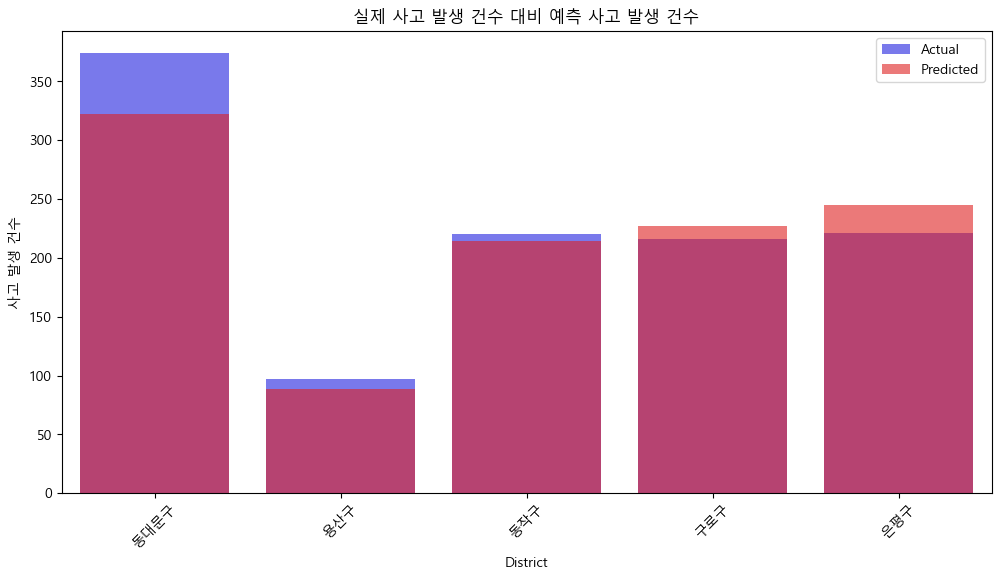

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 세트의 '구' 열 추출 (시각화에 사용)
districts_test = X_test.index

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 예측 결과와 실제 값을 포함하는 데이터 프레임 생성
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
comparison_df['District'] = data.loc[districts_test, '구']

# 결과 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Actual', data=comparison_df, color='blue', alpha=0.6, label='Actual')
sns.barplot(x='District', y='Predicted', data=comparison_df, color='red', alpha=0.6, label='Predicted')
plt.xticks(rotation=45)
plt.ylabel('사고 발생 건수')
plt.title('실제 사고 발생 건수 대비 예측 사고 발생 건수')
plt.legend()
plt.show()

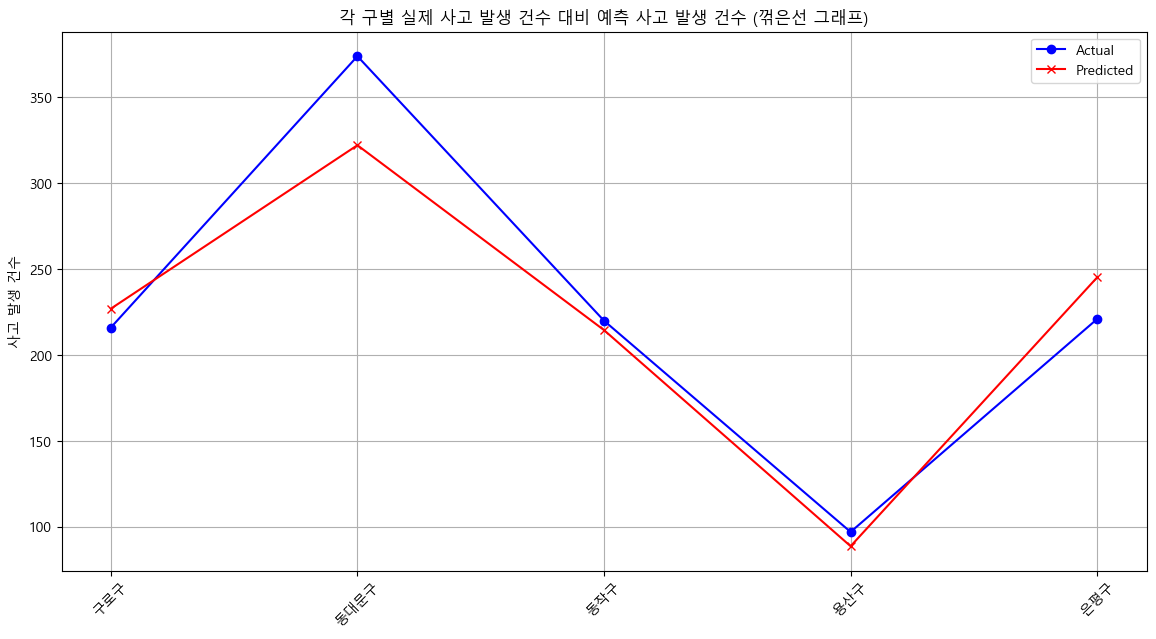

In [6]:
plt.figure(figsize=(14, 7))

# 꺾은선 그래프를 그리기 위해 구별로 정렬
sorted_df = comparison_df.sort_values('District')

# 실제 값과 예측 값을 그래프에 표시
plt.plot(sorted_df['District'], sorted_df['Actual'], label='Actual', marker='o', color='blue')
plt.plot(sorted_df['District'], sorted_df['Predicted'], label='Predicted', marker='x', color='red')

plt.xticks(rotation=45)
plt.ylabel('사고 발생 건수')
plt.title('각 구별 실제 사고 발생 건수 대비 예측 사고 발생 건수 (꺾은선 그래프)')
plt.legend()
plt.grid(True)
plt.show()

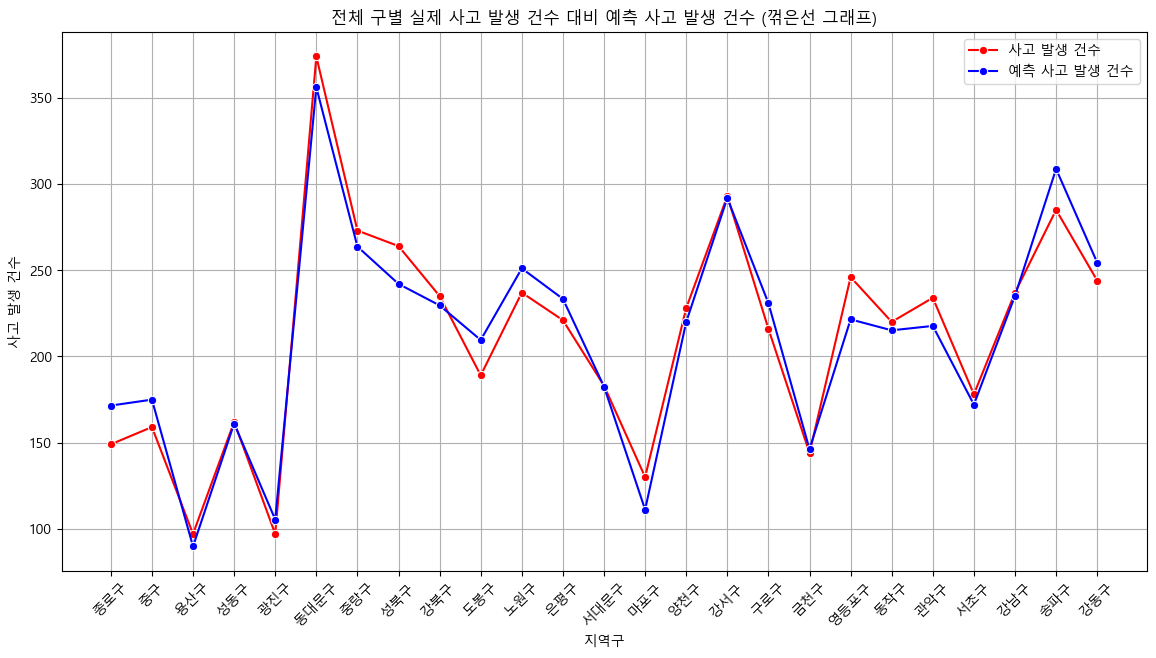

In [8]:
# 전체 데이터셋을 사용하여 모델을 다시 학습
lr_full = LinearRegression()
lr_full.fit(X, y)

# 전체 데이터셋에 대한 예측 수행
y_pred_full = lr_full.predict(X)

# 예측 결과와 실제 데이터를 포함하는 새로운 데이터 프레임 생성
full_comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred_full})
full_comparison_df['District'] = data['구']

# 전체 데이터셋에 대한 예측 결과와 실제 값 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=full_comparison_df, x='District', y='Actual', label='사고 발생 건수', marker='o', color='red')
sns.lineplot(data=full_comparison_df, x='District', y='Predicted', label='예측 사고 발생 건수', marker='o', color='blue')

plt.xticks(rotation=45)
plt.ylabel('사고 발생 건수')
plt.xlabel('지역구')
plt.title('전체 구별 실제 사고 발생 건수 대비 예측 사고 발생 건수 (꺾은선 그래프)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
print(full_comparison_df)

    Actual   Predicted District
0      149  171.478037      종로구
1      159  174.914055       중구
2       97   89.732176      용산구
3      162  161.063388      성동구
4       97  105.357801      광진구
5      374  356.185094     동대문구
6      273  263.705244      중랑구
7      264  242.043788      성북구
8      235  229.581052      강북구
9      189  209.505100      도봉구
10     237  251.064974      노원구
11     221  233.356992      은평구
12     183  182.479971     서대문구
13     130  111.106456      마포구
14     228  219.940724      양천구
15     293  291.857854      강서구
16     216  230.895317      구로구
17     144  146.174148      금천구
18     246  221.464990     영등포구
19     220  215.127029      동작구
20     234  217.673932      관악구
21     178  172.031524      서초구
22     237  235.116408      강남구
23     285  308.748131      송파구
24     244  254.395817      강동구


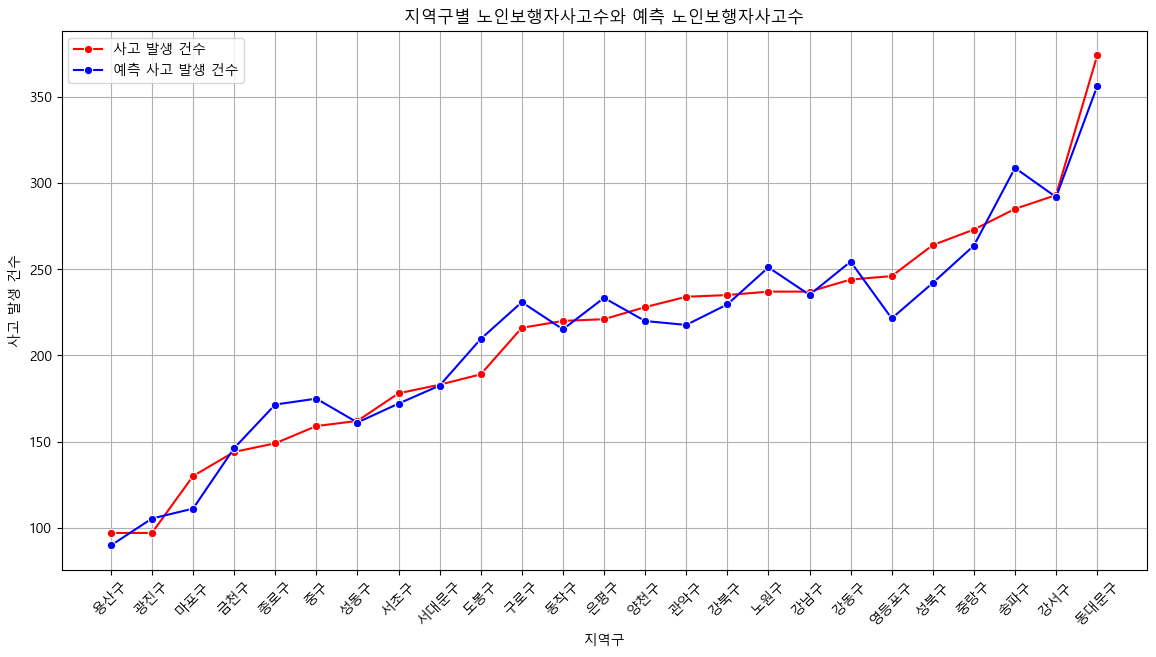

In [9]:
# 실제 사고 발생 건수를 기준으로 데이터를 오름차순 정렬
sorted_full_df = full_comparison_df.sort_values('Actual')

# 정렬된 데이터에 대한 꺾은선 그래프 그리기
plt.figure(figsize=(14, 7))
sns.lineplot(data=sorted_full_df, x='District', y='Actual', label='사고 발생 건수', marker='o', color='red')
sns.lineplot(data=sorted_full_df, x='District', y='Predicted', label='예측 사고 발생 건수', marker='o', color='blue')

plt.xticks(rotation=45)
plt.ylabel('사고 발생 건수')
plt.xlabel('지역구')
plt.title('지역구별 노인보행자사고수와 예측 노인보행자사고수')
plt.legend()
plt.grid(True)
plt.show()


데이터 로드 및 준비: 먼저 '종합db.csv' 파일에서 데이터를 로드했습니다. 이 데이터셋에는 서울시 각 구별로 노인 인구수, 사고 발생 건수, 사고 비율, 병원 수, 노인여가복지시설 수, 노인의료복지시설 수, 재가노인복지시설 수 등의 정보가 포함되어 있습니다.

데이터 전처리:

독립 변수와 종속 변수의 분리: '사고 발생 건수' 열이 종속 변수(예측하고자 하는 변수)입니다. 나머지 열들은 독립 변수로 사용됩니다.
범주형 데이터 처리: '구' 열은 범주형 데이터입니다. 이번 예측에서는 '구' 열을 제외하고 분석을 진행했습니다
데이터 분할:

데이터셋을 훈련 세트와 테스트 세트로 분할했습니다. 이를 위해 sklearn의 train_test_split 함수를 사용했으며, 일반적으로 데이터셋의 70-80%를 훈련 세트로, 나머지 20-30%를 테스트 세트로 분할합니다.
모델 선택 및 학습:

선형 회귀 모델 (Linear Regression):
평균 제곱근 오차 (MSE): 1596.79
결정 계수 (R²): 0.79

랜덤 포레스트 모델 (Random Forest Regressor):
평균 제곱근 오차 (MSE): 5254.12
결정 계수 (R²): 0.32

그래디언트 부스팅 모델 (Gradient Boosting Regressor):
평균 제곱근 오차 (MSE): 3663.56
결정 계수 (R²): 0.53

선형 회귀 모델을 선택했습니다. 선형 회귀는 종속 변수와 한 개 이상의 독립 변수 간의 선형 관계를 모델링합니다.
sklearn의 LinearRegression 클래스를 사용하여 모델을 초기화하고, 훈련 세트를 사용하여 모델을 학습시켰습니다.
모델 평가:

학습된 모델을 테스트 세트에 적용하여 예측을 수행했습니다.
모델의 성능을 평가하기 위해 평균 제곱근 오차(Mean Squared Error, MSE)와 결정 계수(R²)를 사용했습니다.
결과 해석 및 시각화:

예측 결과를 실제 값과 비교하여 모델의 예측 성능을 평가했습니다.
결과를 시각화하기 위해 막대 그래프와 꺾은선 그래프를 사용했습니다.

In [3]:
# pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://news.seoul.go.kr/economy/archives/86912'  # 웹사이트 주소를 입력하세요.
response = requests.get(url)
html = response.content

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')  # 가장 첫 번째 표를 찾습니다.
import pandas as pd

# 표의 행을 리스트로 변환합니다.
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])  # 데이터 정리

# DataFrame 생성
df = pd.DataFrame(data)
csv_file_name = '서울시 구별 전통시장.csv'
df.to_csv(csv_file_name, index=False)

In [3]:
import pandas as pd

# File paths for the new datasets
traditional_markets_file_path = '서울시 구별 전통시장.csv'
parks_file_path = '서울시 구별 공원.csv'

# Reading the datasets
traditional_markets_df = pd.read_csv(traditional_markets_file_path)
parks_df = pd.read_csv(parks_file_path)

# Displaying the first few rows of each dataset for inspection
traditional_markets_df.head(), parks_df.head()


(    0    1        2       3                            4    5          6  \
 0  연번  자치구      시장명      형태                     신주소(구주소)   유형       전화번호   
 1  총계  서울시      369  57,178                          NaN  NaN        NaN   
 2  소계  종로구       27   8,646                          NaN  NaN        NaN   
 3   1  종로구     광장시장     건물형     종로구 창경궁로 88(종로구 예지동 6-1)   등록  2272-0967   
 4   2  종로구  동대문종합시장     건물형  종로구 종로 266(종로구 종로6가 289-42)   등록  2262-0211   
 
           7           8  
 0  건물형(연면적)  점포수(빈점포제외)  
 1       NaN         NaN  
 2       NaN         NaN  
 3    18,975         482  
 4    61,476       3,270  ,
      구  공원수 (개소)
 0   소계      2980
 1  종로구       106
 2   중구        70
 3  용산구       107
 4  성동구       100)

In [4]:
# Data cleaning and preparation for 서울시 구별 전통시장.csv
# Removing header row and summarizing market count by district
traditional_markets_df = traditional_markets_df.iloc[2:]
traditional_markets_df.columns = ['Index', 'District', 'MarketName', 'Type', 'Address', 'Category', 'Phone', 'BuildingArea', 'StoreCount']
markets_count_by_district = traditional_markets_df.groupby('District').size().reset_index(name='MarketCount')

# Data preparation for 서울시 구별 공원.csv
# Removing the summary row
parks_df = parks_df.iloc[1:]
parks_df.columns = ['District', 'ParkCount']

# Merging the datasets
combined_df = pd.merge(markets_count_by_district, parks_df, on='District', how='inner')

# Displaying the first few rows of the merged dataset
combined_df


,District,MarketCount,ParkCount
0,강남구,11,165
1,강동구,10,129
2,강북구,20,87
3,강서구,12,173
4,관악구,23,135
5,광진구,16,68
6,구로구,10,116
7,금천구,8,55
8,노원구,8,187
9,도봉구,11,80


In [5]:
# Load the 종합db.csv file to inspect its structure
comprehensive_db_file_path = '종합db.csv'
comprehensive_db_df = pd.read_csv(comprehensive_db_file_path)

# Displaying the first few rows of the dataset
comprehensive_db_df.head()

,District,노인 인구수,사고 발생 건수,사고 비율(%),병원 수,노인여가복지시설 수,노인의료복지시설 수,재가노인복지시설 수,MarketCount,ParkCount
0,종로구,119521.0,149,0.124664,11,2,11,16,28.0,106.0
1,중구,105030.0,159,0.151385,10,2,3,19,51.0,70.0
2,용산구,169680.0,97,0.057166,2,2,4,13,9.0,107.0
3,성동구,205703.0,162,0.078754,10,5,7,32,12.0,100.0
4,광진구,233658.0,97,0.041514,13,1,22,34,16.0,68.0


In [10]:
# Checking the column names for the district in both datasets
district_column_comprehensive_db = comprehensive_db_df.columns[0] # The first column in comprehensive_db_df
district_column_combined = combined_df.columns[0] # The first column in combined_df

district_column_comprehensive_db, district_column_combined


('구', 'District')

In [19]:
# Renaming the district column in the comprehensive_db_df to match the combined_df
comprehensive_db_df = comprehensive_db_df.rename(columns={'구': 'District'})

# Re-merging the datasets
final_combined_df = pd.merge(comprehensive_db_df, combined_df, on='District', how='inner')

# Displaying the first few rows of the final merged dataset
final_combined_df.head()


csv_file_name = '종합db.csv'
final_combined_df.to_csv(csv_file_name, index=False)

In [21]:
# Renaming columns in the final_combined_df DataFrame
final_combined_df.rename(columns={'MarketCount': '전통시장 수', 'ParkCount': '공원 수'}, inplace=True)

# Calculating the Pearson correlation coefficient between the accident count and other factors
correlation_matrix = final_combined_df[['사고 발생 건수', '노인 인구수', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수', 'MarketCount', 'ParkCount']].corr()

# Focusing on the correlation of accident count with other variables
accident_correlation = correlation_matrix['사고 발생 건수'].sort_values(ascending=False)

accident_correlation


KeyError: "['MarketCount', 'ParkCount'] not in index"